thank you for participating!
your score was 3 out of 8!


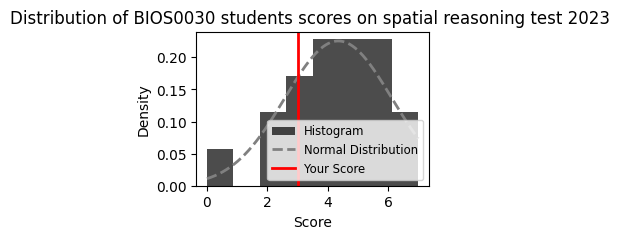

In [2]:
from IPython.display import display, HTML, Image, clear_output, HTML
import random
import time
import requests
from bs4 import BeautifulSoup
import json
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
from jupyter_ui_poll import ui_events
import requests
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

imgnum=['1','2','3','4','5','6','7','8']
imgangle=['xy','xz','yz','fake']
#these lists will be iterated through in order to create file names 
rule_dict = { 
    '1' : 'a',  
    '2' : 'b',  
    '3' : 'c',  
    '4' : 'd'} 
#dictionary here gives the answers a number value 
event_info = {
    'type': '',
    'description': '',
    'time': -1
}
def wait_for_event(timeout=-1, interval=0.001, max_rate=20, allow_interupt=True):    
    start_wait = time.time()
    event_info['type'] = ""
    event_info['description'] = ""
    event_info['time'] = -1
    n_proc = int(max_rate*interval)+1    
    with ui_events() as ui_poll:
        keep_looping = True
        while keep_looping==True:
            ui_poll(n_proc)
            if (timeout != -1) and (time.time() > start_wait + timeout):
                keep_looping = False
            if allow_interupt==True and event_info['description']!="":
                keep_looping = False
            time.sleep(interval)
    return event_info
#function relating to the buttons used to select an answer, code writte by Dr Philip Lewis


def register_event(btn):
    # display button description in output area
    event_info['type'] = "click"
    event_info['description'] = btn.description
    event_info['time'] = time.time()
    return
#function relating to the buttons used to select an answer, code writte by Dr Philip Lewis

def send_to_google_form(data_dict, form_url):
    ''' Helper function to upload information to a corresponding google form 
        You are not expected to follow the code within this function!
    '''
    form_id = form_url[34:90]
    view_form_url = f'https://docs.google.com/forms/d/e/{form_id}/viewform'
    post_form_url = f'https://docs.google.com/forms/d/e/{form_id}/formResponse'
    page = requests.get(view_form_url)
    content = BeautifulSoup(page.content, "html.parser").find('script', type='text/javascript')
    content = content.text[27:-1]
    result = json.loads(content)[1][1]
    form_dict = {}    
    loaded_all = True
    for item in result:
        if item[1] not in data_dict:
            print(f"Form item {item[1]} not found. Data not uploaded.")
            loaded_all = False
            return False
        form_dict[f'entry.{item[4][0][0]}'] = data_dict[item[1]]    
    post_result = requests.post(post_form_url, data=form_dict)
    time.sleep(1)
    print ("your data has been uploaded.")
    return
#function which allows the results to be sent to google forms, data then transferred to google sheets,code writte by Dr Philip Lewis
def questionsrunner():    
    btn0 = widgets.Button(description="a")
    btn1 = widgets.Button(description="b")
    btn2 = widgets.Button(description="c")
    btn3 = widgets.Button(description="d")
    btn0.on_click(register_event)
    btn1.on_click(register_event) 
    btn2.on_click(register_event) 
    btn3.on_click(register_event)
    abcd = widgets.HBox([btn0, btn1, btn2,btn3])
    totalans=8
    timestaken=[]
#defining key variabkles such buttons and panels
    
    for y in range (len(imgnum)):
#for loop used to iterate through all questions        
        filelist=[]
        print(f"question {y+1}: which of the views (a-d) can not be made by rotating the cube arrangement shown?")
        start_time = time.time()
        display(Image(str(y+1) +'.png'))
        
        for i in range (len(imgangle)):
#for loop used to iterate through different angles of the shapes shown as well as the incorrect answer         
            filelist.append(str(y+1) + imgangle[i] +'.png')        
        random.shuffle(filelist)        
        for b in range (len(filelist)):               
            if filelist[b]== str(y+1) +'fake'+'.png':
                correctans= rule_dict[str(b+1)]                            
        image_width = 200
        image_height = 200
        images_html = ''.join(f'<div style="display:inline-block; margin:10px;"><strong>{chr(97+i)}.</strong><br><img src="{img}" style="width:{image_width}px; height:{image_height}px;"/></div>' for i, img in enumerate(filelist))
        display(HTML(images_html))
#selection is displayed         
        
        display(abcd)         
#panel containing slection of answers is displayed 
        result = wait_for_event(timeout=9999)
        if result['description'] == correctans:                    
            text="correct!"
            style= "color: green; font_size: 50px;"
            html_out = HTML (f"<span style='{style}'>{text}</span>")
            display(html_out)
            end_time = time.time()
            time_taken = end_time - start_time
        else:
            text="incorrect!"
            style= "color: red; font_size: 50px;"
            html_out = HTML (f"<span style='{style}'>{text}</span>")
            totalans=totalans-1
            display(html_out)
            end_time= time.time()
            time_taken= end_time - start_time
        #if statement used to record time as well as, displaying whether the user got the question right or wrong 
        timestaken.append(str(time_taken))
        time.sleep(1.5)
        clear_output(wait=  False)
        if y+1 <= (len(imgnum))-1:
            text="next question"
            style= "color: black; font_size: 100px;"
            html_out = HTML (f"<span style='{style}'>{text}</span>")
            display(html_out)
            time.sleep(2)
            clear_output(wait=  False)                      
        else:
            print ("thank you for participating!")
            print (f"your score was {totalans} out of 8!")
        #if statement used in order to check whihc question number the user is on, if the list containing the qurstion numbers has not be completely iterated through, 'next question' appears, if it has then the user is granted with a completion message as well as a display of their total score
    timestaken.append(str(totalans))
    return timestaken


################################################################################################################################################################
print ("welcome to the spatial arrangement test")
time.sleep(2)

data_consent_info = """DATA CONSENT INFORMATION:

Please read:

we wish to record your response data

to an anonymised public data repository.

Your data will be used for educational teaching purposes

practising data analysis and visualisation.

Please type yes in the box below if you consent to the upload. if you do not wish to share your data with us, please press ENTER"""

print(data_consent_info)

result = input("> ")


while result != "yes" and result != "":
    print("invalid input!, please try again.")
    result = input(">")
#user must enter yes or '' in order to complete the test, question will be looped until valid answer is given

if result =="yes":
    
    id_instructions =""" 
    
    Enter your anonymised ID
    
    To generate an anonymous 4-letter unique user identifier please enter:
    
    - two letters based on the initials (first and last name) of a childhood friend
    
    - two letters based on the initials (first and last name) of a favourite actor / actress
    
    e.g. if your friend was called Charlie Brown and film star was Tom Cruise
    
    then your unique identifer would be CBTC"""
    
    
    print(id_instructions)
    
    user_id = input("> ")
    
    print("User entered id:", user_id)
    
    time.sleep(2)
    
    sex = input("Please enter your sex:")

data=questionsrunner()


your_score=int(data[-1])

classcorrects = [3, 5, 2, 2, 6, 5, 3, 4, 3, 7, 7, 4, 5, 6, 4, 6, 5, 4, 0, 6] 
plt.figure(figsize=(3, 2)) #change this if too big or too small 
plt.hist(classcorrects, bins=8, density=True, alpha=0.7, color='black', label='Histogram')
mean = np.mean(classcorrects)
std_dev = np.std(classcorrects)
x = np.linspace(min(classcorrects), max(classcorrects), 1000)
y = norm.pdf(x, mean, std_dev)
plt.plot(x, y, color='grey', linestyle='--', linewidth=2, label='Normal Distribution')
plt.axvline(x=your_score, color='red', linestyle='-', linewidth=2, label='Your Score')

plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Distribution of BIOS0030 students scores on spatial reasoning test 2023 ') #change this
plt.legend(fontsize='small') #you can change this if you change the size of the image 
plt.show()

#AI used to help create a small histogram where the user can compare their test score with the data used for analysis  


form_url = 'https://docs.google.com/forms/d/e/1FAIpQLSc7Ox0fp4StM4Gipicn-2Ow2h2OT1DIGAfmhxPQgUrmMynkaw/viewform?usp=sf_link'

if result== 'yes':
#if user has given permission, upload of their data will follow the dictionary layout 
    data_dict = {

        'name': user_id,

        'sex': sex,
    
        'time take to complete question 1:': data[0],

        'time take to complete question 2:':  data[1],

        'time take to complete question 3:' : data[2],

        'time take to complete question 4:' : data[3],

        'time take to complete question 5:' : data[4],

        'time take to complete question 6:' : data[5],

        'time take to complete question 7:' : data[6],

        'time take to complete question 8:' : data[7],

        'total score:' : data[-1]

        }
    
    
    send_to_google_form(data_dict,form_url)

